<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Pairs_Trading_Strategt_Cointegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pairs Trading Strategy with Cointegration**
## **Introduction**

Pairs trading is a market-neutral trading strategy that involves identifying two securities with historically high correlation and taking opposing positions when their price relationship diverges. Cointegration is a statistical property of two or more time series variables that indicate a long-term equilibrium relationship. Pairs trading seeks to exploit this relationship by trading on the mean reversion of the price spread between the two securities.

# **Scripts**

**1. Identifying Cointegrated Pairs**

[*********************100%%**********************]  2 of 2 completed


Cointegration Test p-value: 0.8561129978160672


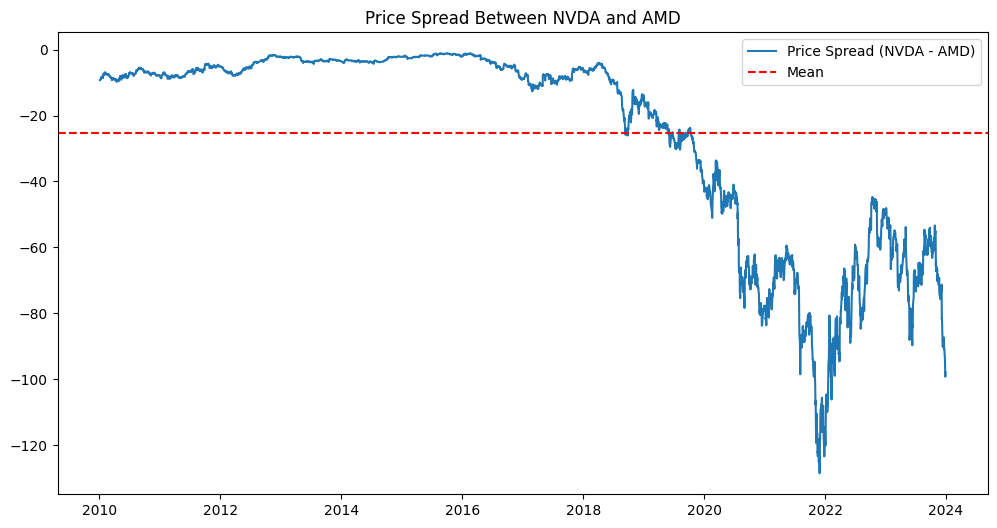

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

# Download historical data for Nvidia (NVDA) and AMD (AMD)
tickers = ['NVDA', 'AMD']
data = yf.download(tickers, start='2010-01-01', end='2024-01-01')['Adj Close']

# Check for cointegration
score, p_value, _ = coint(data['NVDA'], data['AMD'])
print(f'Cointegration Test p-value: {p_value}')

# Plot the price spread
spread = data['NVDA'] - data['AMD']
plt.figure(figsize=(12, 6))
plt.plot(spread, label='Price Spread (NVDA - AMD)')
plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.title('Price Spread Between NVDA and AMD')
plt.show()


**2. Implementing a Pairs Trading Strategy**

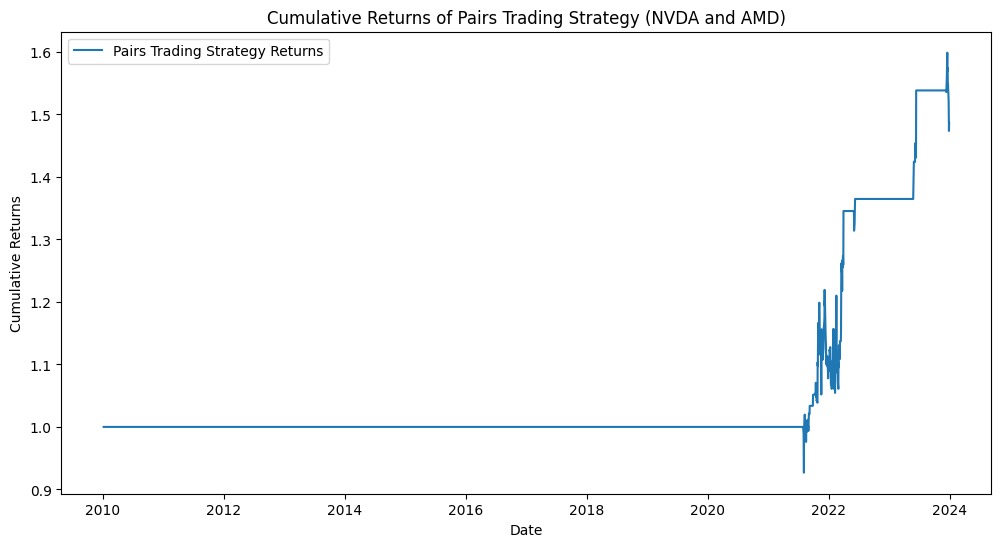

In [2]:
# Calculate the Z-score of the price spread
spread_mean = spread.mean()
spread_std = spread.std()
data['Z-Score'] = (spread - spread_mean) / spread_std

# Generate trading signals
data['Signal'] = np.where(data['Z-Score'] > 2, -1, np.where(data['Z-Score'] < -2, 1, 0))

# Calculate strategy returns
data['NVDA_Returns'] = data['NVDA'].pct_change()
data['AMD_Returns'] = data['AMD'].pct_change()
data['Strategy_Returns'] = data['Signal'].shift(1) * (data['NVDA_Returns'] - data['AMD_Returns'])

# Calculate cumulative returns
data['Cumulative_Strategy_Returns'] = (data['Strategy_Returns'] + 1).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Strategy_Returns'], label='Pairs Trading Strategy Returns')
plt.title('Cumulative Returns of Pairs Trading Strategy (NVDA and AMD)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


# **Interpretation**

The cointegration test p-value indicates whether the price series of NVDA and AMD are cointegrated. A p-value below 0.05 suggests a strong long-term equilibrium relationship. The Z-score helps to identify overbought and oversold conditions, triggering trading signals when the spread deviates significantly from its mean. The cumulative returns plot shows the performance of the pairs trading strategy.

